In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
data=pd.read_csv(r"Downloads\kidney_disease.csv")

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.shape

(400, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
colums=['sg','sl','sc','hemo','pcv','wbcc','rbcc','htn','classification']

In [8]:
data1=data.drop([col for col in data.columns if not col in colums],axis=1)

In [9]:
data1=data1.dropna(axis=0)

In [10]:
for column in data1.columns:
    if data[column].dtype==np.number:
        continue
    data1[column]=LabelEncoder().fit_transform(data1[column])

<ipython-input-10-b0e2e3287776>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:


In [11]:
data1.head()

,sg,sc,hemo,pcv,htn,classification
0,1.020,1.2,15.4,28,1,0
1,1.020,0.8,11.3,22,0,0
2,1.010,1.8,9.6,15,0,0
3,1.005,3.8,11.2,16,1,0
4,1.010,1.4,11.6,19,0,0


In [12]:
data1.shape

(288, 6)

In [13]:
x=data1.drop(['classification'],axis=1)

In [14]:
x

,sg,sc,hemo,pcv,htn
0,1.020,1.2,15.4,28,1
1,1.020,0.8,11.3,22,0
2,1.010,1.8,9.6,15,0
3,1.005,3.8,11.2,16,1
4,1.010,1.4,11.6,19,0
...,...,...,...,...,...
395,1.020,0.5,15.7,31,0
396,1.025,1.2,16.5,38,0
397,1.020,0.6,15.8,33,0
398,1.025,1.0,14.2,35,0


In [15]:
x.shape

(288, 5)

In [16]:
x.columns

Index(['sg', 'sc', 'hemo', 'pcv', 'htn'], dtype='object')

In [17]:
y=data1['classification']

In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 288, dtype: int32

In [19]:
#feature scaling
x_scaler=MinMaxScaler()
x_scaler.fit(x)
column_name=x.columns
x[column_name]=x_scaler.transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,shuffle=True)

In [21]:
model=Sequential()
model.add(Dense(300,input_dim=len(x.columns),kernel_initializer=keras.initializers.random_normal(seed=13),activation='relu'))
model.add(Dense(1,activation='hard_sigmoid'))

In [22]:
model.compile(loss="binary_crossentropy",
             optimizer='adam',
             metrics='accuracy')

In [23]:
history=model.fit(x_train,y_train,epochs=1000,batch_size=x_train.shape[0])

Epoch 1/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6943 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6871 - accuracy: 0.5130
Epoch 3/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6800 - accuracy: 0.5609
Epoch 4/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6731 - accuracy: 0.6739
Epoch 5/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6664 - accuracy: 0.7565
Epoch 6/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6598 - accuracy: 0.7826
Epoch 7/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6533 - accuracy: 0.8087
Epoch 8/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6469 - accuracy: 0.8130
Epoch 9/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6406 - accuracy: 0.8130
Epoch 10/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6344 - accuracy: 0.8130
Epoch 11/1000
1/1 [==========

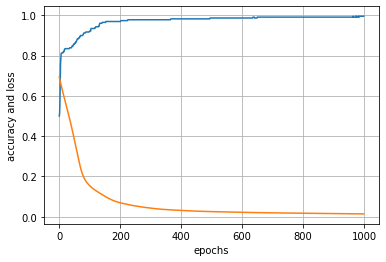

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('accuracy and loss')
plt.xlabel('epochs')
plt.grid(True)


In [25]:
test=model.predict(x_test)
test

array([[1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.7621453 ],
       [0.34935567],
       [0.        ],
       [0.42450354],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.49966002],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.41078636],
       [0.        ],
       [0.   

In [26]:
pred=[1 if y>=0.5 else 0 for y in test]
pred

[1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1]

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,pred)

0.9827586206896551